<a href="https://colab.research.google.com/github/Arfi3/submission/blob/main/Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data : Bike-sharing-dataset



*   Nama: Arfi Nadhifa Hananti
*   Email: arfinadhifa@student.ub.ac.id
*   ID Dicoding: arfi_nadhifa



## Menentukan Pertanyaan Bisnis



* Bagaimana musim, cuaca, temperatur, temperatur yang dirasakan, dan kelembapan memengaruhi peminjaman sepeda?
* Kapan waktu paling banyak peminjam sepeda?
* Kapan waktu paling sedikit peminjam sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 57.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.1 MB/s eta 0:00:00


In [2]:
pip install numpy pandas scipy matplotlib seaborn

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from babel.numbers import format_currency
from matplotlib.gridspec import GridSpec
%matplotlib inline
sns.set(style='dark')

## Data Wrangling

 Gathering Data

In [4]:
day = pd.read_csv("https://raw.githubusercontent.com/Arfi3/submission/main/data/day.csv")
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Assesing Data



 Menilai day



In [5]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dilihat dari hasil, menunjukan tidak ada missing value, namun terdapat kesalahan tipe data untuk kolom dteday. Kolom tersebut harusnya direpresentasikan sebagai tipe data datetime, bukan object. Selain itu, kolom season, yr, mnth, holiday, weekday, working day, weathersit dapat diubah menjadi tipe data kategorikal.

In [6]:
print("Jumlah duplikasi: ", day.duplicated().sum())

Jumlah duplikasi:  0


Tidak terdapat data yang terduplikasi.

In [7]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Tidak ada keanehan dalam data tersebut.

Cleaning Data

Membersihkan Data day

In [8]:
day.value_counts(ascending=False).head(1)

instant  dteday      season  yr  mnth  holiday  weekday  workingday  weathersit  temp      atemp     hum       windspeed  casual  registered  cnt
1        2011-01-01  1       0   1     0        6        0           2           0.344167  0.363625  0.805833  0.160446   331     654         985    1
dtype: int64

Berdasarkan tampilan, akan dihapus beberapa kolom, seperti :
1. instan : hanya menunjukan sebuah indeks.
2. dteday : karena sudah terdapat kolom terpisah untuk tahun('yr') dan bulan('mnth').

Kita akan menyimpan dataframe baru sebagai day_new.


In [9]:
day.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [10]:
day_new=day[['season', 'yr', 'mnth', 'holiday', 'weekday','workingday', 'weathersit', 'temp',
               'atemp', 'hum', 'windspeed','casual', 'registered', 'cnt']]

Merubah int64 menjadi kategorikal.

In [12]:
# Merubah 'Season' menjadi kategorikal
day_new = day_new.copy()
day_new['season'].replace([1, 2, 3, 4], ['Springer', 'Summer', 'Fall', 'Winter'], inplace=True)

In [13]:
# Merubah 'yr' menjadi kategorikal
day_new = day_new.copy()
day_new['yr'].replace([0, 1], ['2011', '2012'], inplace=True)

In [14]:
# Merubah 'mnth' menjadi kategorikal

import calendar

day_new['mnth'] = day_new['mnth'].apply(lambda x: calendar.month_abbr[x])
day_new['mnth'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [15]:
# Merubah 'weekday' menjadi kategorikal
import calendar

day_new['weekday'] = day_new['weekday'].apply(lambda x: calendar.day_abbr[x])
day_new['weekday'].unique()

array(['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'], dtype=object)

In [16]:
# Merubah 'weathersit' menjadi kategorikal
day_new['weathersit']=day_new['weathersit'].replace([1, 2, 3, 4], ['Clear', 'Mist_Cloudy', 'Light_Snow_Rain', 'Heavy_rain'])
day_new['weathersit'].value_counts()

Clear              463
Mist_Cloudy        247
Light_Snow_Rain     21
Name: weathersit, dtype: int64

In [17]:
day_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    object 
 1   yr          731 non-null    object 
 2   mnth        731 non-null    object 
 3   holiday     731 non-null    int64  
 4   weekday     731 non-null    object 
 5   workingday  731 non-null    int64  
 6   weathersit  731 non-null    object 
 7   temp        731 non-null    float64
 8   atemp       731 non-null    float64
 9   hum         731 non-null    float64
 10  windspeed   731 non-null    float64
 11  casual      731 non-null    int64  
 12  registered  731 non-null    int64  
 13  cnt         731 non-null    int64  
dtypes: float64(4), int64(5), object(5)
memory usage: 80.1+ KB


## Exploratory Data Analysis (EDA)

Eksplorasi day

Memperjelas data dengan merubah nama kolom menjadi lebih mudah dibaca.

In [18]:
day_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,Springer,2011,Jan,0,Sun,0,Mist_Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,Springer,2011,Jan,0,Mon,0,Mist_Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,Springer,2011,Jan,0,Tue,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,Springer,2011,Jan,0,Wed,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,Springer,2011,Jan,0,Thu,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [19]:
day_new.describe()

,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.028728,0.683995,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,0.167155,0.465233,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,0.000000,0.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,0.000000,0.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,0.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,0.000000,1.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,1.000000,1.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [20]:
# Jumlah registered berdasarkan "season"
season_stats = day_new.groupby('season').agg({
    'season': 'count',
    'cnt': ['sum', 'mean'],
    'casual': 'sum',
    'registered': 'sum'
})
season_stats.columns = ['jml_penyewa', 'total_penyewa', 'mean', 'casual', 'registered']
print(season_stats)

          jml_penyewa  total_penyewa         mean  casual  registered
season                                                               
Fall              188        1061129  5644.303191  226091      835038
Springer          181         471348  2604.132597   60622      410726
Summer            184         918589  4992.331522  203522      715067
Winter            178         841613  4728.162921  129782      711831


In [ ]:
# Jumlah registered berdasarkan "weathersit"
weathersit_stats = day_new.groupby('weathersit').agg({
    'weathersit': 'count',
    'cnt': ['sum', 'mean'],
    'casual': 'sum',
    'registered': 'sum'
})
weathersit_stats.columns = ['jml_penyewa', 'total_penyewa', 'mean', 'casual', 'registered']
print(weathersit_stats)

                 jml_penyewa  total_penyewa         mean  casual  registered
weathersit                                                                  
Clear                    463        2257952  4876.786177  446346     1811606
Light_Snow_Rain           21          37869  1803.285714    3895       33974
Mist_Cloudy              247         996858  4035.862348  169776      827082


In [29]:
# Jumlah registered berdasarkan "temp"
day_new.groupby(['temp',])[['registered', 'casual','cnt']].sum().sort_values(by=['registered', 'casual','cnt'], ascending=False)

,registered,casual,cnt
temp,,,
0.635000,21314,4698,26012
0.564167,20799,5640,26439
0.649167,20100,4116,24216
0.514167,18027,4936,22963
0.484167,17768,4370,22138
...,...,...,...
0.291304,573,440,1013
0.376522,491,114,605
0.274783,451,303,754


In [28]:
# Jumlah registered berdasarkan "atemp"
day_new.groupby(['atemp',])[['registered', 'casual','cnt']].sum().sort_values(by=['registered', 'casual','cnt'], ascending=False)

,registered,casual,cnt
atemp,,,
0.654688,20491,3933,24424
0.637008,14698,3261,17959
0.607975,13079,1642,14721
0.654054,12361,2381,14742
0.375621,11321,1931,13252
...,...,...,...
0.203600,472,34,506
0.279961,451,303,754
0.220333,432,9,441


In [30]:
# Jumlah registered berdasarkan "hum"
day_new.groupby(['hum',])[['registered', 'casual','cnt']].sum().sort_values(by=['registered', 'casual','cnt'], ascending=False)

,registered,casual,cnt
hum,,,
0.613333,18388,5735,24123
0.630833,17700,2590,20290
0.552083,17188,2576,19764
0.570000,16767,3676,20443
0.690000,16075,2704,18779
...,...,...,...
0.882500,570,57,627
0.948261,491,114,605
0.681304,451,303,754


In [ ]:
# Jumlah registered berdasarkan "yr"
year_stats = day_new.groupby('yr').agg({
    'yr': 'count',
    'cnt': ['sum', 'mean'],
    'casual': 'sum',
    'registered': 'sum'
})
year_stats.columns = ['jml_penyewa', 'total_penyewa', 'mean', 'casual', 'registered']
print(year_stats)

      jml_penyewa  total_penyewa         mean  casual  registered
yr                                                               
2011          365        1243103  3405.761644  247252      995851
2012          366        2049576  5599.934426  372765     1676811


In [ ]:
# Jumlah registered berdasarkan "mnth"
month_stats = day_new.groupby('mnth').agg({
    'mnth': 'count',
    'cnt': ['sum', 'mean'],
    'casual': 'sum',
    'registered': 'sum'
})
month_stats.columns = ['jml_penyewa', 'total_penyewa', 'mean', 'casual', 'registered']
print(month_stats)

      jml_penyewa  total_penyewa         mean  casual  registered
mnth                                                             
Apr            60         269094  4484.900000   60802      208292
Aug            62         351194  5664.419355   72039      279155
Dec            62         211036  3403.806452   21693      189343
Feb            57         151352  2655.298246   14963      136389
Jan            62         134933  2176.338710   12042      122891
Jul            62         344948  5563.677419   78157      266791
Jun            60         346342  5772.366667   73906      272436
Mar            62         228920  3692.258065   44444      184476
May            62         331686  5349.774194   75285      256401
Nov            60         254831  4247.183333   36603      218228
Oct            62         322352  5199.225806   59760      262592
Sep            60         345991  5766.516667   70323      275668


In [ ]:
# Jumlah registered berdasarkan waktu ke waktu
day_new.groupby(['season','yr', 'mnth',])['registered'].sum()

season  yr    mnth
Fall    2011  Aug     107849
              Jul     104889
              Jun      39413
              Sep      72049
        2012  Aug     171306
              Jul     161902
              Jun      52214
              Sep     125416
Spring  2011  Dec      19237
              Feb      41973
              Jan      35116
              Mar      32249
        2012  Dec      17298
              Feb      94416
              Jan      87775
              Mar      82662
Summer  2011  Apr      72524
              Jun      73487
              Mar      18970
              May     104771
        2012  Apr     135768
              Jun     107322
              Mar      50595
              May     151630
Winter  2011  Dec      59638
              Nov      86573
              Oct      98289
              Sep      28824
        2012  Dec      93170
              Nov     131655
              Oct     164303
              Sep      49379
Name: registered, dtype: int64

In [ ]:
# Jumlah casual berdasarkan waktu ke waktu
day_new.groupby(['season','yr', 'mnth',])['casual'].sum()

season  yr    mnth
Fall    2011  Aug     28842
              Jul     36452
              Jun     10313
              Sep     19843
        2012  Aug     43197
              Jul     41705
              Jun     13448
              Sep     32291
Spring  2011  Dec      3153
              Feb      6242
              Jan      3073
              Mar      8957
        2012  Dec      3310
              Feb      8721
              Jan      8969
              Mar     18197
Summer  2011  Apr     22346
              Jun     20299
              Mar      3869
              May     31050
        2012  Apr     38456
              Jun     29846
              Mar     13421
              May     44235
Winter  2011  Dec      5295
              Nov     15594
              Oct     25222
              Sep      6702
        2012  Dec      9935
              Nov     21009
              Oct     34538
              Sep     11487
Name: casual, dtype: int64

In [ ]:
# Jumlah pengendara per bulan
day_new.groupby('mnth').sum(numeric_only=True)['cnt']

mnth
Apr    269094
Aug    351194
Dec    211036
Feb    151352
Jan    134933
Jul    344948
Jun    346342
Mar    228920
May    331686
Nov    254831
Oct    322352
Sep    345991
Name: cnt, dtype: int64

In [ ]:
# Rata-rata total peminjaman tiap bulan
day_new.groupby('mnth')['cnt'].mean()

mnth
Apr    4484.900000
Aug    5664.419355
Dec    3403.806452
Feb    2655.298246
Jan    2176.338710
Jul    5563.677419
Jun    5772.366667
Mar    3692.258065
May    5349.774194
Nov    4247.183333
Oct    5199.225806
Sep    5766.516667
Name: cnt, dtype: float64

In [ ]:
# Total penyewa berdasarkan workingday(1 untuk hari masuk, 0 untuk hari libur)

workingday_stats = day_new.groupby('workingday').agg({
    'workingday': 'count',
    'cnt': ['sum', 'mean'],
    'casual': 'sum',
    'registered': 'sum'
})
workingday_stats.columns = ['jml_penyewa', 'total_penyewa', 'mean', 'casual', 'registered']
print(workingday_stats)

            jml_penyewa  total_penyewa         mean  casual  registered
workingday                                                             
0                   231        1000269  4330.168831  316732      683537
1                   500        2292410  4584.820000  303285     1989125


In [ ]:
# Total penyewa berdasarkan Hari
weekday_stats = day_new.groupby('weekday').agg({
    'weekday': 'count',
    'cnt': ['sum', 'mean'],
    'casual': 'sum',
    'registered': 'sum'
})
weekday_stats.columns = ['jml_penyewa', 'total_penyewa', 'mean', 'casual', 'registered']
print(weekday_stats)

         jml_penyewa  total_penyewa         mean  casual  registered
weekday                                                             
Fri              104         485395  4667.259615   61460      423935
Mon              105         444027  4228.828571  140521      303506
Sat              104         487790  4690.288462   78238      409552
Sun              105         477807  4550.542857  153852      323955
Thu              104         473048  4548.538462   57319      415729
Tue              105         455503  4338.123810   70784      384719
Wed              104         469109  4510.663462   57843      411266


## Visualization & Explanatory Analysis

Pertanyaan 1:

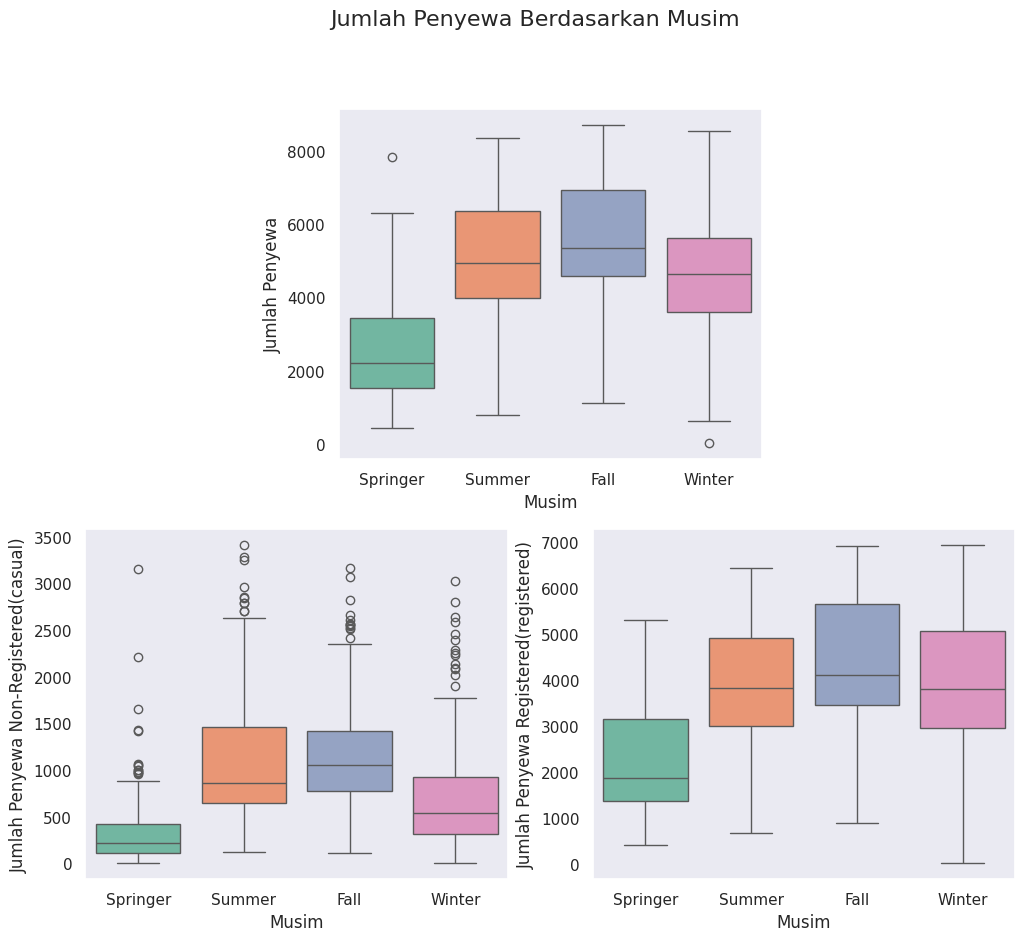

In [51]:
#Visualisasi penyewa sepeda berdasarkan "season"
fig = plt.figure(figsize=(12, 10))
gs1 = GridSpec(4, 4, fig, wspace=0.5, hspace=0.5)
plt.suptitle("Jumlah Penyewa Berdasarkan Musim", fontsize=16)

plt.subplot(gs1[:2, 1:3])
sns.boxplot(x='season', y='cnt', data=day_new, palette="Set2", hue='season', legend=False)
plt.xlabel("Musim", fontsize=12)
plt.ylabel("Jumlah Penyewa", fontsize=12)

plt.subplot(gs1[2:, :2])
sns.boxplot(x='season', y='casual', data=day_new, palette="Set2", hue='season', legend=False)
plt.xlabel("Musim", fontsize=12)
plt.ylabel("Jumlah Penyewa Non-Registered(casual)", fontsize=12)

plt.subplot(gs1[2:, 2:])
sns.boxplot(x='season', y='registered', data=day_new, palette="Set2", hue='season', legend=False)
plt.xlabel("Musim", fontsize=12)
plt.ylabel("Jumlah Penyewa Registered(registered)", fontsize=12)

plt.show()

Dapat dilihat bahwa jumlah penyewa registered naik pada Fall season(musim gugur), dan turun pada springer season( musim semi), sedangkan jumlah penyewa non-registered(casual) naik pada summer and fall season (musim panas, dan musim gugur), dan turun pada springer season (musim semi).

Sehingga untuk keseluruhan penyewa sepeda akan naik pada Fall season(musim gugur), dan turun pada springer season( musim semi).

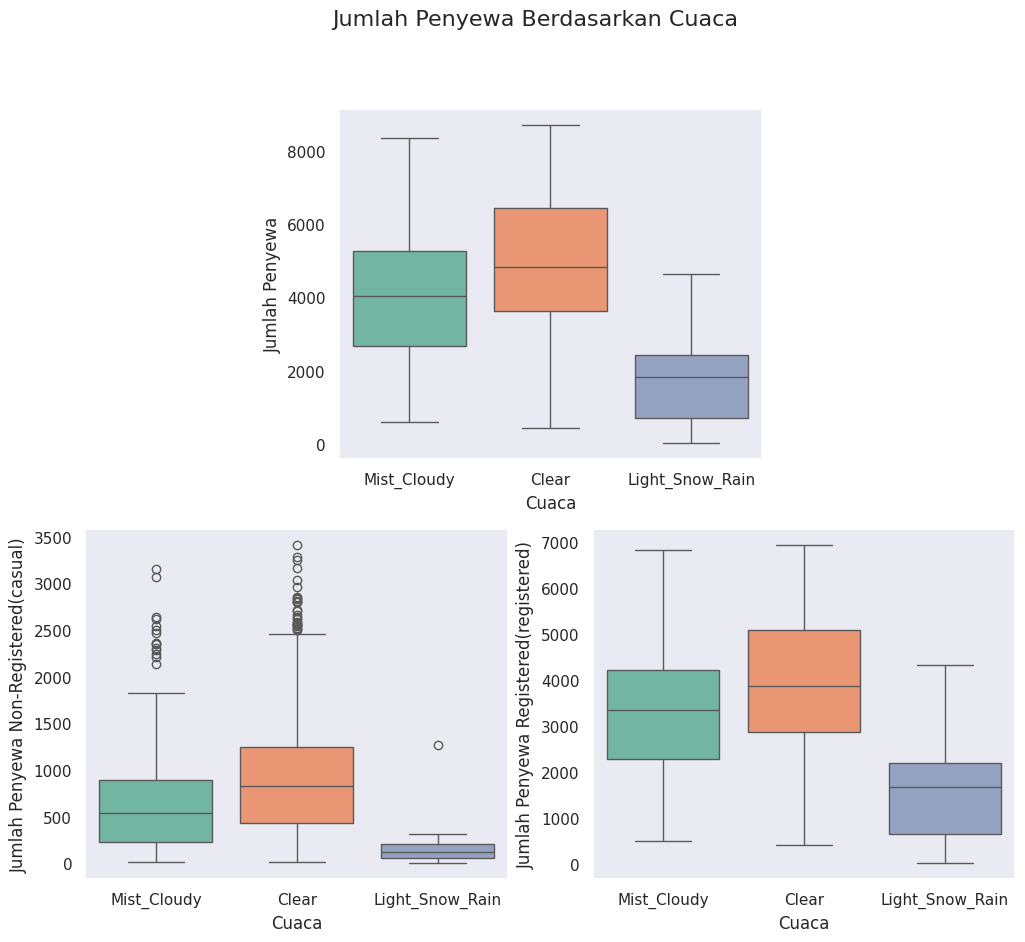

In [50]:
#Visualisasi penyewa sepeda berdasarkan "wheatersit"
fig = plt.figure(figsize=(12, 10))
gs1 = GridSpec(4, 4, fig, wspace=0.5, hspace=0.5)
plt.suptitle("Jumlah Penyewa Berdasarkan Cuaca", fontsize=16)

plt.subplot(gs1[:2, 1:3])
sns.boxplot(x='weathersit', y='cnt', data=day_new, palette="Set2", hue='weathersit', legend=False)
plt.xlabel("Cuaca", fontsize=12)
plt.ylabel("Jumlah Penyewa", fontsize=12)

plt.subplot(gs1[2:, :2])
sns.boxplot(x='weathersit', y='casual', data=day_new, palette="Set2", hue='weathersit', legend=False)
plt.xlabel("Cuaca", fontsize=12)
plt.ylabel("Jumlah Penyewa Non-Registered(casual)", fontsize=12)

plt.subplot(gs1[2:, 2:])
sns.boxplot(x='weathersit', y='registered', data=day_new, palette="Set2", hue='weathersit', legend=False)
plt.xlabel("Cuaca", fontsize=12)
plt.ylabel("Jumlah Penyewa Registered(registered)", fontsize=12)

plt.show()

Dapat dilihat bahwa jumlah penyewa registered naik pada saat cuaca cerah, dan turun pada saat cuaca bersalju, hal serupa pada jumlah penyewa non-registered(casual) naik pada saat cuaca cerah, dan turun pada saat cuaca bersalju

Sehingga untuk keseluruhan penyewa sepeda akan naik pada saat cuaca cerah, dan turun pada saat cuaca bersalju.

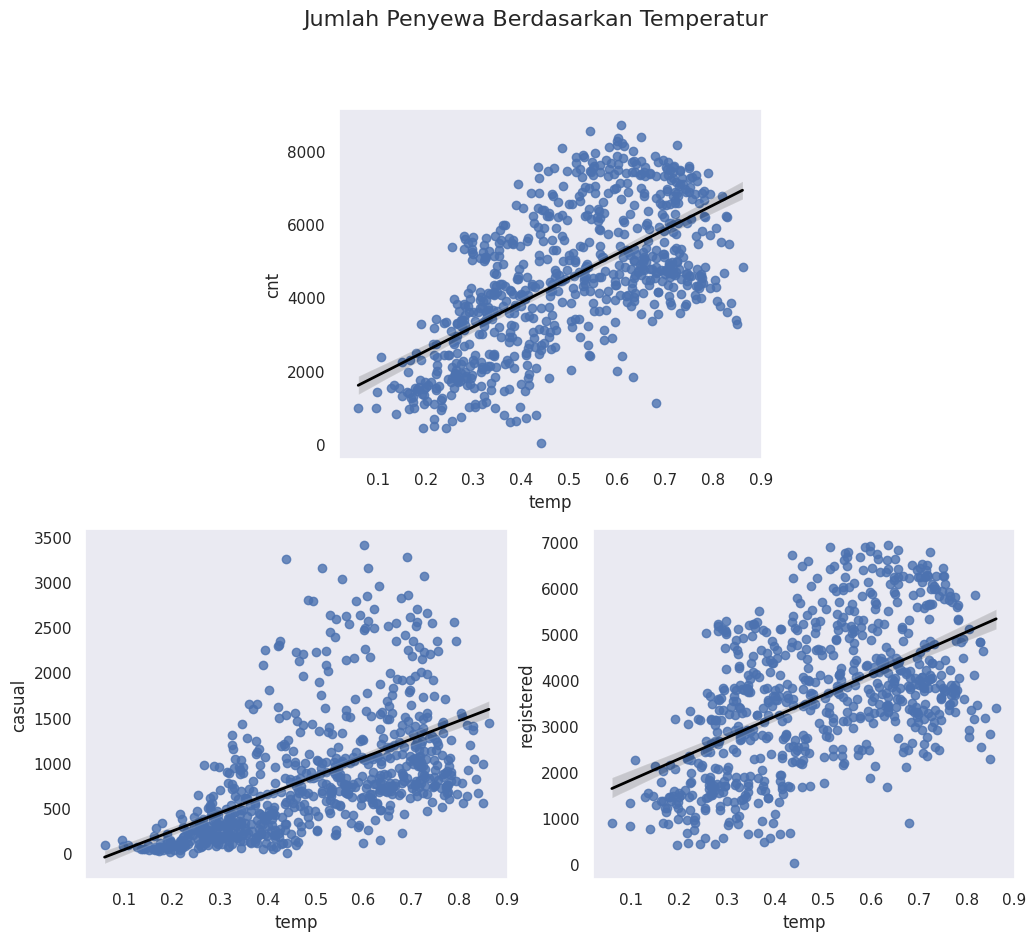

In [57]:
#Visualisasi penyewa sepeda berdasarkan "temp"
fig = plt.figure(figsize=(12, 10))
gs1 = GridSpec(4, 4, fig, wspace=0.5, hspace=0.5)
plt.suptitle("Jumlah Penyewa Berdasarkan Temperatur", fontsize=16)
plt.subplot(gs1[:2, 1:3])
sns.regplot(x='temp', y='cnt', data=day_new,
            line_kws={"color":"black", "linewidth":2})
plt.subplot(gs1[2:, :2])
sns.regplot(x='temp', y='casual', data=day_new,
            line_kws={"color":"black", "linewidth":2})
plt.subplot(gs1[2:, 2:])
sns.regplot(x='temp', y='registered', data=day_new,
            line_kws={"color":"black", "linewidth":2})
plt.show()

Dapat dilihat, terdapat hubungan positif antara temperatur dan jumlah penyewa baik registered, non registered, maupun total keseluruhan penyewa dimana semakin tinggi temperatur semakin banyak jumlah penyewa.

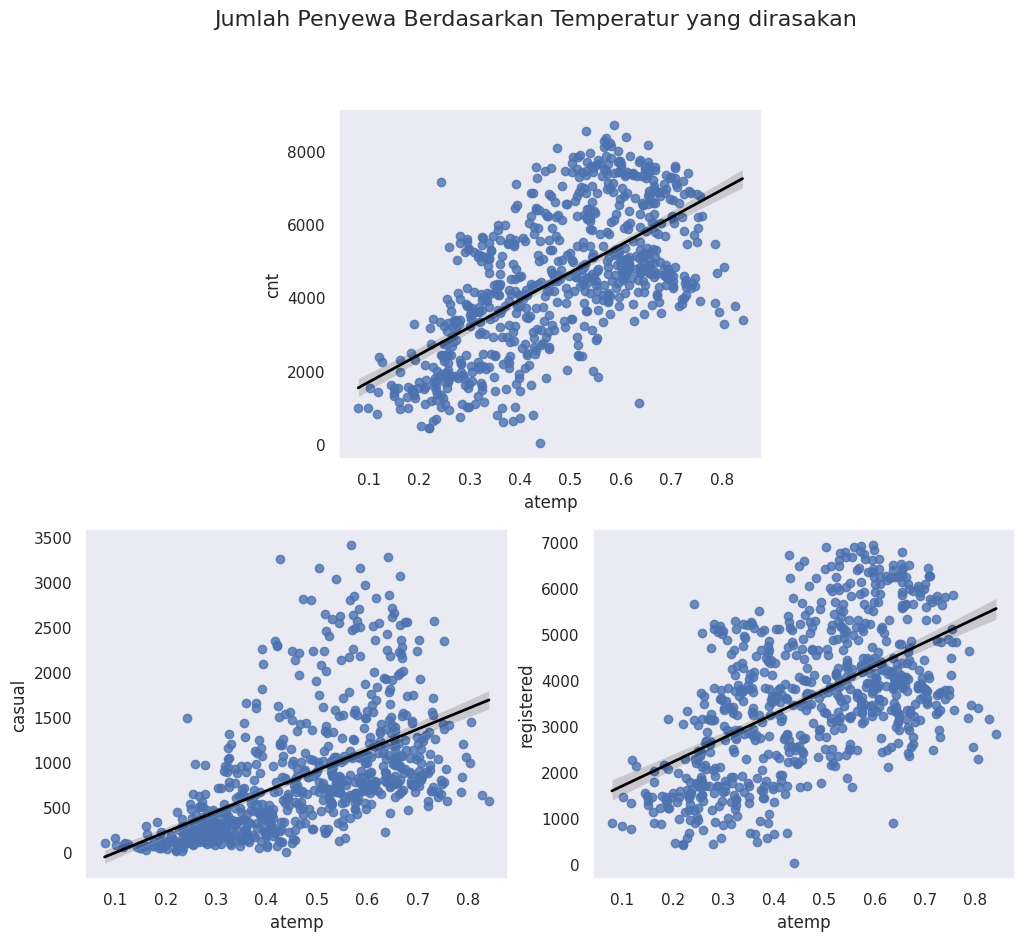

In [56]:
#Visualisasi penyewa sepeda berdasarkan "atemp"
fig = plt.figure(figsize=(12, 10))
gs1 = GridSpec(4, 4, fig, wspace=0.5, hspace=0.5)
plt.suptitle("Jumlah Penyewa Berdasarkan Temperatur yang dirasakan", fontsize=16)
plt.subplot(gs1[:2, 1:3])
sns.regplot(x='atemp', y='cnt', data=day_new,
            line_kws={"color":"black", "linewidth":2})
plt.subplot(gs1[2:, :2])
sns.regplot(x='atemp', y='casual', data=day_new,
            line_kws={"color":"black", "linewidth":2})
plt.subplot(gs1[2:, 2:])
sns.regplot(x='atemp', y='registered', data=day_new,
            line_kws={"color":"black", "linewidth":2})
plt.show()

Dapat dilihat, terdapat hubungan positif antara temperatur yang dirasakan dan jumlah penyewa baik registered, non registered, maupun total keseluruhan penyewa dimana semakin tinggi temperatur semakin banyak jumlah penyewa.

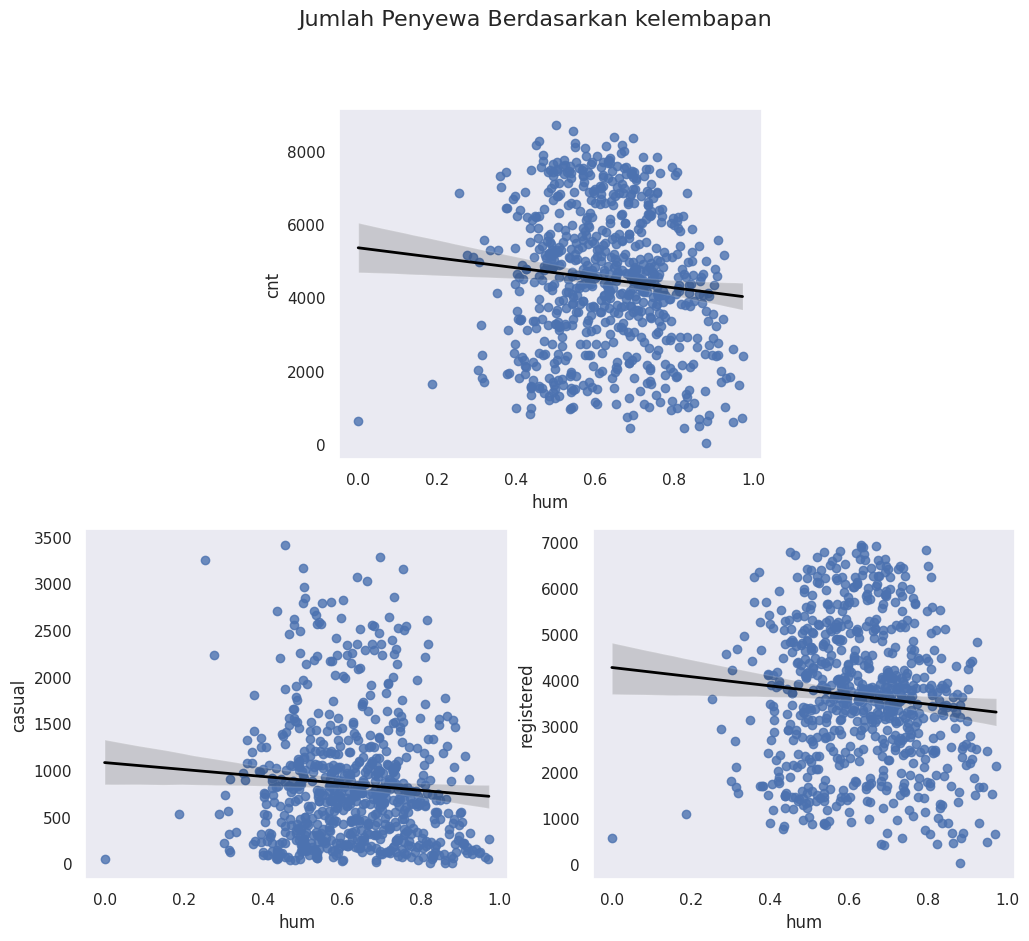

In [58]:
#Visualisasi penyewa sepeda berdasarkan "hum"
fig = plt.figure(figsize=(12, 10))
gs1 = GridSpec(4, 4, fig, wspace=0.5, hspace=0.5)
plt.suptitle("Jumlah Penyewa Berdasarkan kelembapan", fontsize=16)
plt.subplot(gs1[:2, 1:3])
sns.regplot(x='hum', y='cnt', data=day_new,
            line_kws={"color":"black", "linewidth":2})
plt.subplot(gs1[2:, :2])
sns.regplot(x='hum', y='casual', data=day_new,
            line_kws={"color":"black", "linewidth":2})
plt.subplot(gs1[2:, 2:])
sns.regplot(x='hum', y='registered', data=day_new,
            line_kws={"color":"black", "linewidth":2})
plt.show()

Dari plot yang disajikan, tidak terlihat jelas antara kelembapan dan penyewa sepeda, regresi linear yang digambarkan oleh garis hitam relatif datar atau memiliki kemiringan yang sangat kecil, yang menunjukan bahwa kelembapan mungkin tidak memiliki pengaruh yang signifikan terhadap jumlah penyewa sepeda.

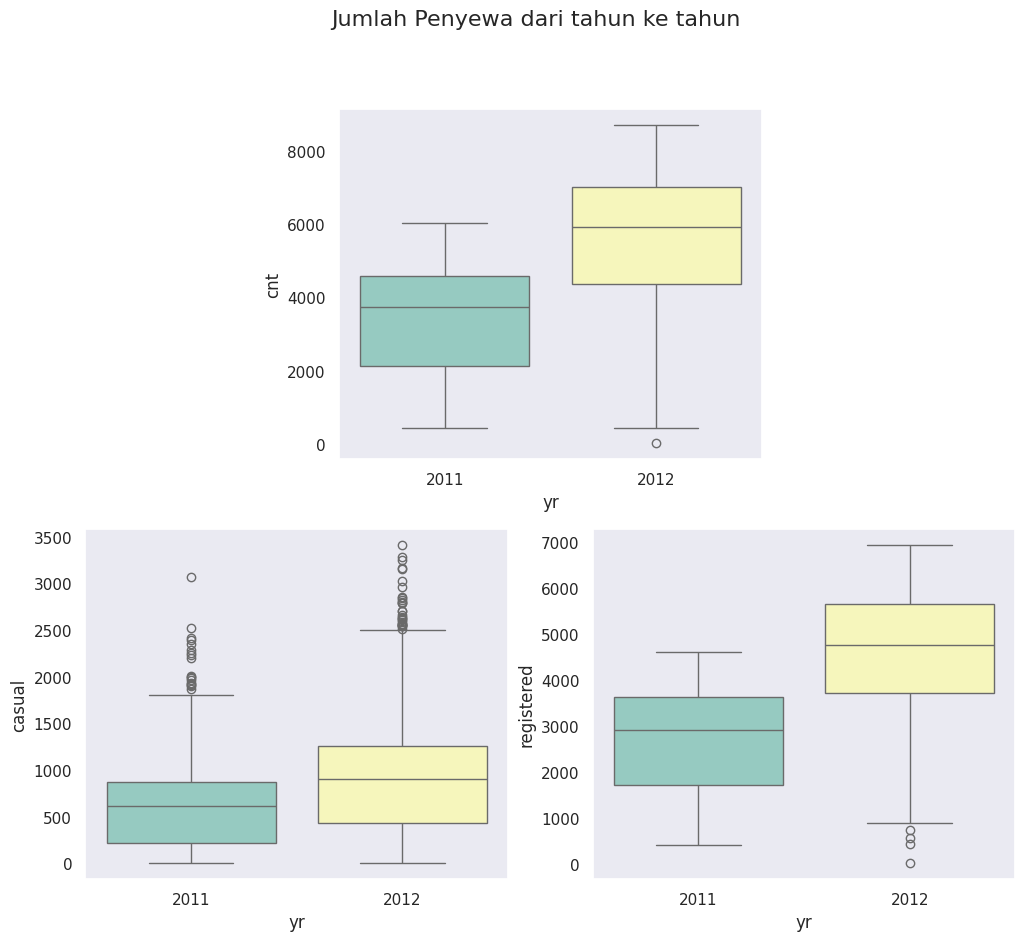

In [64]:
#Visualisasi penyewa sepeda berdasarkan "yr"
fig = plt.figure(figsize=(12, 10))
gs1 = GridSpec(4, 4, fig, wspace=0.5, hspace=0.5)
plt.suptitle("Jumlah Penyewa dari tahun ke tahun", fontsize=16)
plt.subplot(gs1[:2, 1:3])
sns.boxplot(x='yr', y='cnt', data=day_new, palette="Set3", hue='yr', legend=False)
plt.subplot(gs1[2:, :2])
sns.boxplot(x='yr', y='casual', data=day_new, palette="Set3", hue='yr', legend=False)
plt.subplot(gs1[2:, 2:])
sns.boxplot(x='yr', y='registered', data=day_new, palette="Set3", hue='yr', legend=False)
plt.show()

Dapat dilihat, bahwa penyewaan sepeda dari tahun ketahun mengalami peningkatan.

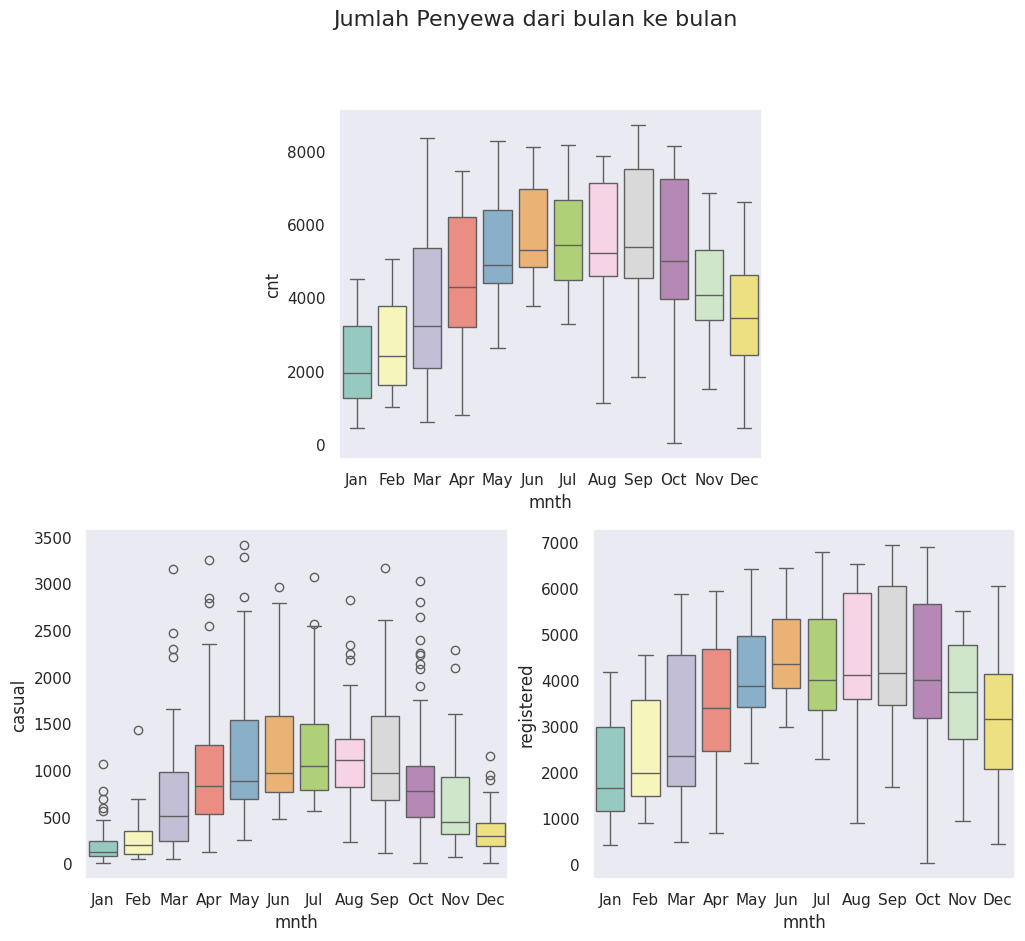

In [73]:
#Visualisasi penyewa sepeda berdasarkan "mnth"
fig = plt.figure(figsize=(12, 10))
gs1 = GridSpec(4, 4, fig, wspace=0.5, hspace=0.5)
plt.suptitle("Jumlah Penyewa dari bulan ke bulan", fontsize=16)
plt.subplot(gs1[:2, 1:3])
sns.boxplot(x='mnth', y='cnt', data=day_new, palette="Set3", hue='mnth', legend=False)
plt.subplot(gs1[2:, :2])
sns.boxplot(x='mnth', y='casual', data=day_new, palette="Set3", hue='mnth', legend=False)
plt.subplot(gs1[2:, 2:])
sns.boxplot(x='mnth', y='registered', data=day_new, palette="Set3", hue='mnth', legend=False)
plt.show()

Dapat dilihat bahwa terdapat variasi pada jumlah penyewa sepeda dari bulan ke bulan yang dapat dilihat dari perbedaan median dan persebaran data disetiap bulan nya. Puncak jumlah penyewa sepeda terjadi pada bulan-bulan musim panas(dari bulan Mei sampai bulan September) dan cenderung lebih rendah pada bulan-bulan musim dingin (dari bulan November sampai bulan Februari).

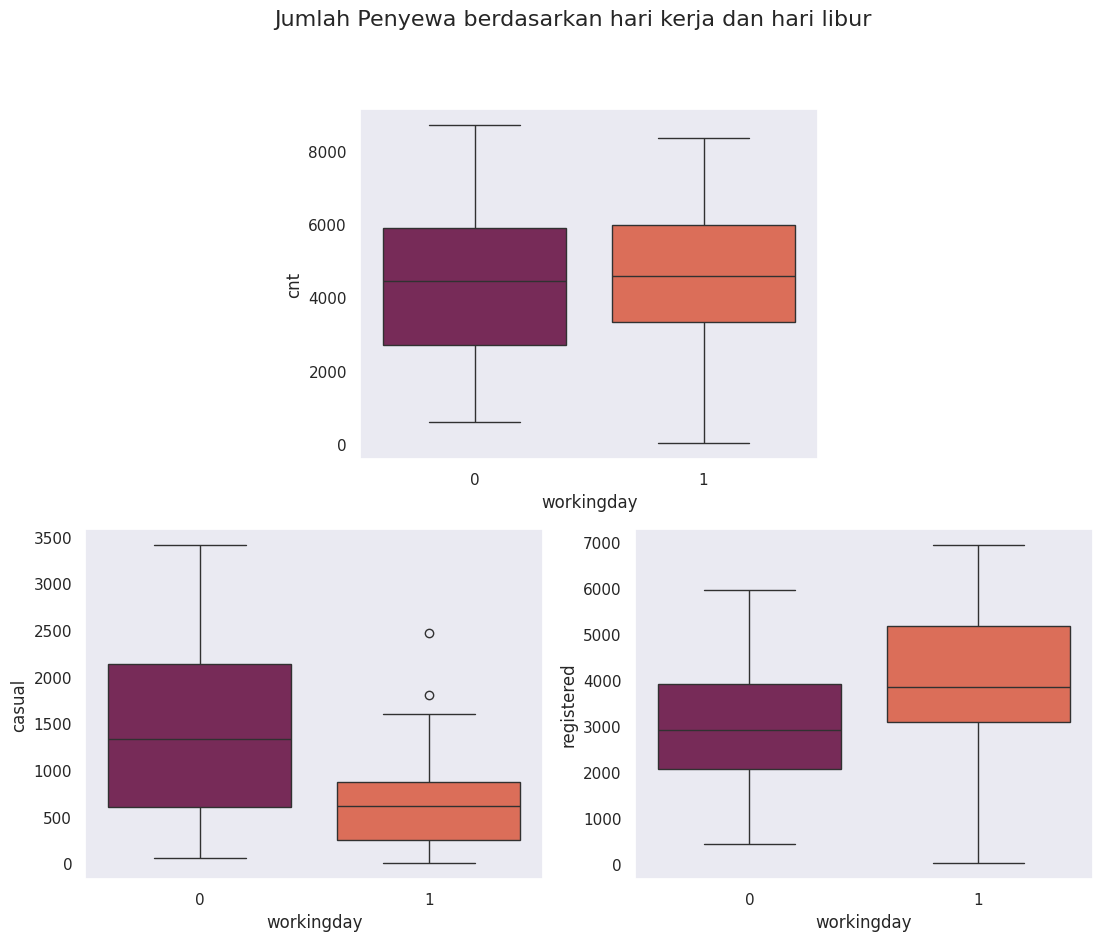

In [85]:
#Visualisasi penyewa sepeda berdasarkan "workingday"
fig = plt.figure(figsize=(13, 10))
gs1 = GridSpec(4, 4, fig, wspace=0.5, hspace=0.5)
plt.suptitle("Jumlah Penyewa berdasarkan hari kerja dan hari libur", fontsize=16)
plt.subplot(gs1[:2, 1:3])
sns.boxplot(x='workingday', y='cnt', data=day_new, palette="rocket", hue='workingday', legend=False)
plt.subplot(gs1[2:, :2])
sns.boxplot(x='workingday', y='casual', data=day_new, palette="rocket", hue='workingday', legend=False)
plt.subplot(gs1[2:, 2:])
sns.boxplot(x='workingday', y='registered', data=day_new, palette="rocket", hue='workingday', legend=False)
plt.show()


Dapat dilihat, bahwa pada jumlah penyewa non-registered memiliki total penyewa lebih tinggi pada hari libur, sedangkan untuk jumlah penyewa registered memiliki total penyewa lebih tinggi pada hari kerja.

Total jumlah penyewa memiliki jumlah hampir sama antara hari libur dan hari kerja.

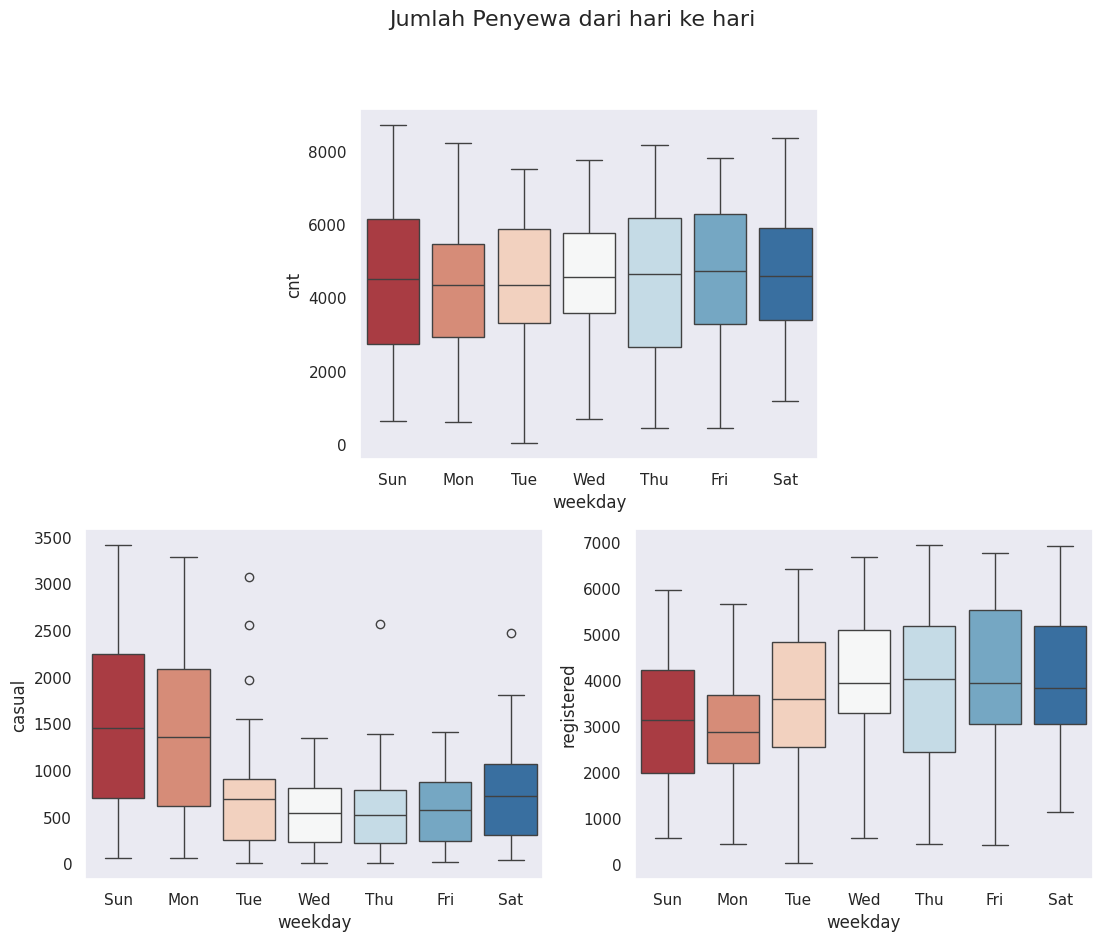

In [86]:
#Visualisasi penyewa sepeda berdasarkan "weekday"
fig = plt.figure(figsize=(13, 10))
gs1 = GridSpec(4, 4, fig, wspace=0.5, hspace=0.5)
plt.suptitle("Jumlah Penyewa dari hari ke hari", fontsize=16)
plt.subplot(gs1[:2, 1:3])
sns.boxplot(x='weekday', y='cnt', data=day_new, palette="RdBu", hue='weekday', legend=False)
plt.subplot(gs1[2:, :2])
sns.boxplot(x='weekday', y='casual', data=day_new, palette="RdBu", hue='weekday', legend=False)
plt.subplot(gs1[2:, 2:])
sns.boxplot(x='weekday', y='registered', data=day_new, palette="RdBu", hue='weekday', legend=False)
plt.show()

Dapat dilihat bahwa jumlah penyewa sepeda cukup bervariasi dari hari ke hari dalam seminggu, pada jumlah penyewa sepeda registered, penyewa sepeda tertinggi pada hari jum'at, sedangkan untuk non-registered jumlah tertinggi pada hari minggu.

## Conclusion

*   Conclusion Pertanyaan 1 (Bagaimana musim, cuaca, temperatur, temperatur yang dirasakan, dan kelembapan memengaruhi peminjaman sepeda?)

Dari visualisasi data, dapat dilihat bahwa musim, cuaca, temperatur, dan temperatur yang dirasakan berpengaruh pada jumlah peminjam sepeda baik registered, non-registered, maupun total seluruh peminjam sepeda. Musim mempengaruhi kenaikan jumlah peminjam, pada saat musim semi jumlah peminjaman sepeda mencapai puncak tertinggi. Hal ini juga selaras pada cuaca yang mengalami puncak tertinggipada saat cuaca cerah. Temperatur dan temperatur yang dirasakan mempengaruhi jumlah peminjaman, dimana semakin tinggi temperatur dan temperatur yang dirasakan, total peminjam baik registered maupun non-registered mengalami peningkatan. Sebaliknya, kelembapan tidak terlalu berpengaruh pada jumlah peminjaman.

*   Conclusion Pertanyaan 2 (Kapan waktu paling banyak peminjam sepeda?)

Dari visualisasi data, terjadi peningkatan jumlah peminjam sepeda dari tahun 2011 ke 2012. Waktu yang paling sering digunakan untuk peminjaman sepeda adalah selama bulan-bulan musim panas, mulai dari bulan Mei hingga September.

Ketika mempertimbangkan peminjaman sepeda setiap harinya, pengguna terdaftar (registered) lebih cenderung melakukan peminjaman pada hari kerja, dengan puncak aktivitas terjadi pada hari Jumat. Di sisi lain, pengguna non-terdaftar (non-registered) lebih cenderung melakukan peminjaman pada hari libur, dengan puncak aktivitas terjadi pada hari Minggu.

*   Conclusion Pertanyaan 3 (Kapan waktu paling sedikit peminjam sepeda?)

Dari visualisasi data, aktu yang paling jarang untuk peminjaman sepeda adalah selama bulan-bulan musim dingin, mulai dari bulan November hingga Februari.

Ketika mempertimbangkan peminjaman sepeda setiap harinya, pengguna terdaftar (registered) lebih cenderung jarang melakukan peminjaman pada hari libur. Di sisi lain, pengguna non-terdaftar (non-registered) lebih cenderung jaranf melakukan peminjaman pada hari kerja.

